Christiaan van Roon - 11122854  
Sander Hansen - 10995080

# Histogram Equalization

In [1]:
#Pylab inline is not a good habit to use
import numpy
import matplotlib

from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

## Exercises

1 **Equalization.** Let $f: \mathcal{D}\rightarrow[0,M]\in \mathcal{R}$. Give the
   expression for the function $\psi$ in this case.  
   *Answer*: $$\psi(v) = M \cdot H_f(v)$$
   
2 **Code.** In practice scalar images are often 8, 10 or 12 bit per
   pixel. In such cases it is unnescessary to first make the image
   into a floating point image (with 32 or even 64 bits per pixel),
   you would like a histogram equalization algorithm to work on the
   integer representation instead of a real valued
   representation. Write a program to do just that.

   Hint: an often used way to do this is to work with a look-up
   table. For each possible scalar value `v` you calculate the
   histogram equalized value (and you may use floating point values
   here) and store the result in an array, say `HE`. In Numpy
   the actual table lookup then is as simple as `HE[image]`
   where `image` is the original image array.

   Please note that the `imread` function from
   `matplotlib.pylab` always returns a floating point
   representation of an image even it was stored in the file in an 8
   bit per pixel format. You can use the `imread` function from
   `scipy.ndimage` instead. The image 'cameraman.png' from the
   standard images is an 8 bit per pixel image.

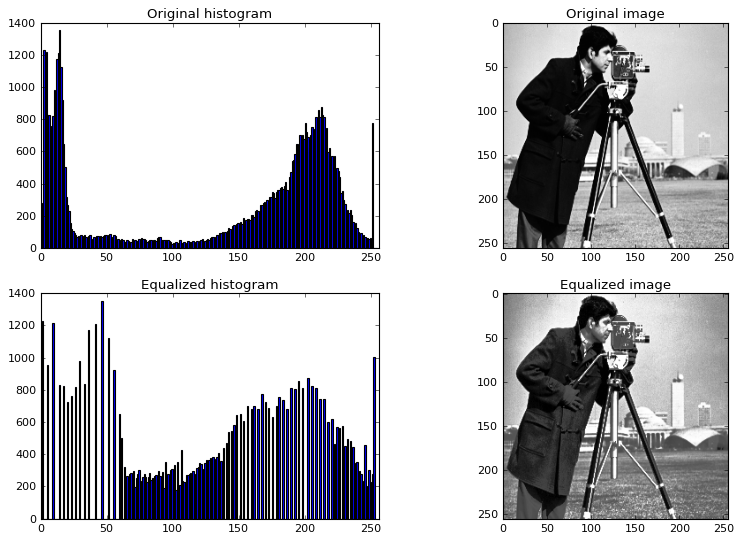

In [2]:
from scipy.ndimage import imread

def histogramEqualization(f, bins=100, v_range=1):
    his, be = histogram(f, range=(0, v_range), bins=bins)
    his = his.astype(int)/sum(his) * v_range
    return interp(f, be[1:], cumsum(his)) 

#Read in image and flatten for grayscale
img = imread('TestData/cameraman1.png')

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')

#Plot histogram of image
plt.subplot(2,2,1)
plt.hist(img.flatten(), arange(0, 256))
plt.xlim(0, 256)
plt.title('Original histogram')

#Plot original image
plt.subplot(2,2,2)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')

#Histogram Equalization
plt.subplot(2,2,3)
new_img = histogramEqualization(img, 256, 256)
plt.hist(new_img.flatten(), arange(0, 256))
plt.xlim(0, 256)
plt.title('Equalized histogram')

# #Plot equalized image
plt.subplot(2,2,4)
plt.imshow(new_img, cmap=plt.cm.gray)
plt.title('Equalized image')

plt.show()

3 **Practical Use.** Make several pictures of the same scene/object
   from different points of view. Most likely the overal intensity
   scaling in the images is not equal due to the automatic lighting
   correction in your camera. Use histogram equalization to correct
   for this. 

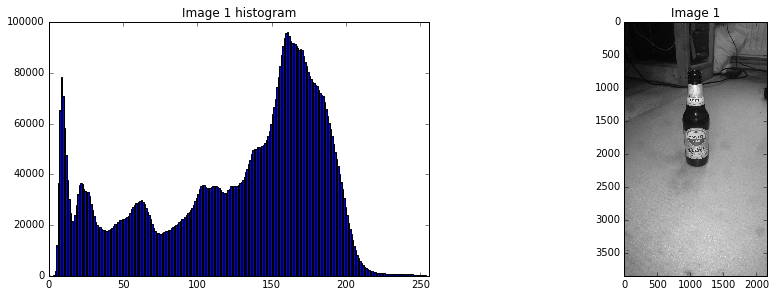

In [3]:
img1 = imread('TestData/rad1.JPG', mode="L")
img2 = imread('TestData/rad2.JPG', mode="L")
img3 = imread('TestData/rad3.JPG', mode="L")
img4 = imread('TestData/rad4.JPG', mode="L")

plt.figure(figsize=(15,10))

#Plot original histogram
plt.subplot(2,2,1)
plt.hist(img1.flatten(), arange(0, 256))
plt.xlim(0, 256)
plt.title('Image 1 histogram')

#Plot original image
plt.subplot(2,2,2)
plt.imshow(img1, cmap=plt.cm.gray)
plt.title('Image 1')

plt.show()

img1_range = max(img1.flatten()) - min(img1.flatten()) + 1

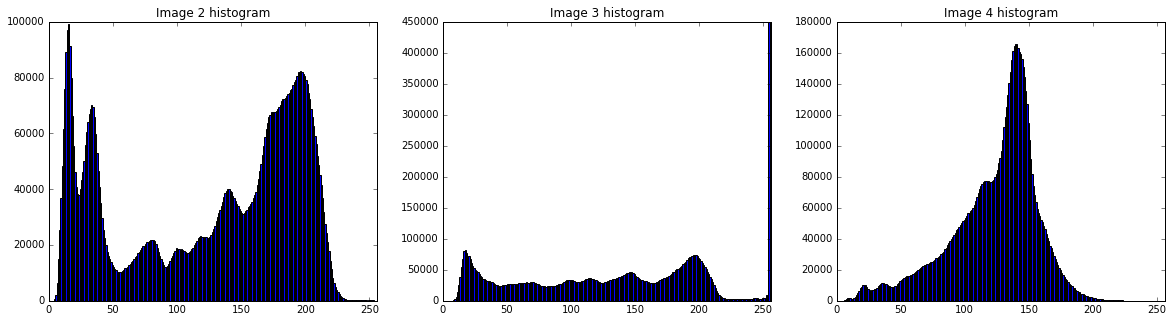

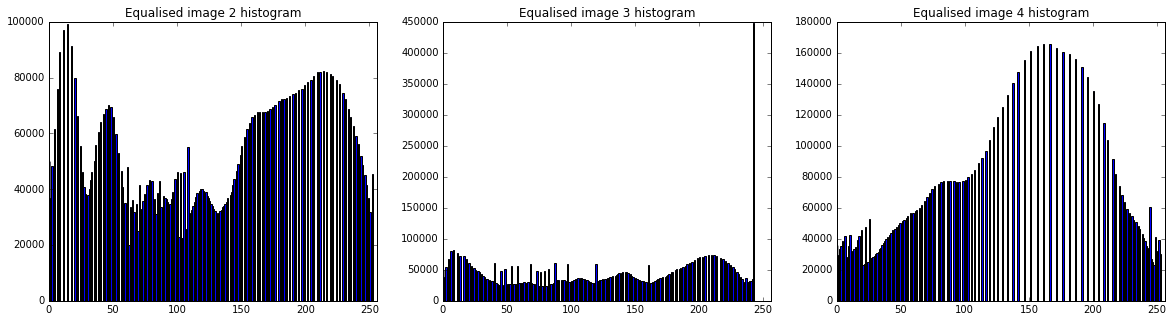

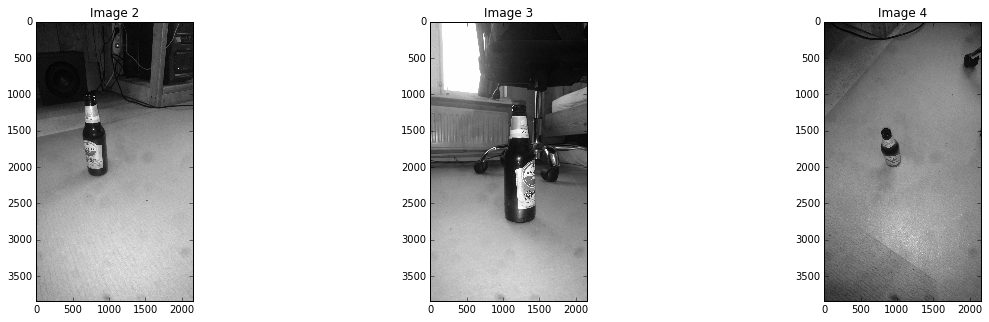

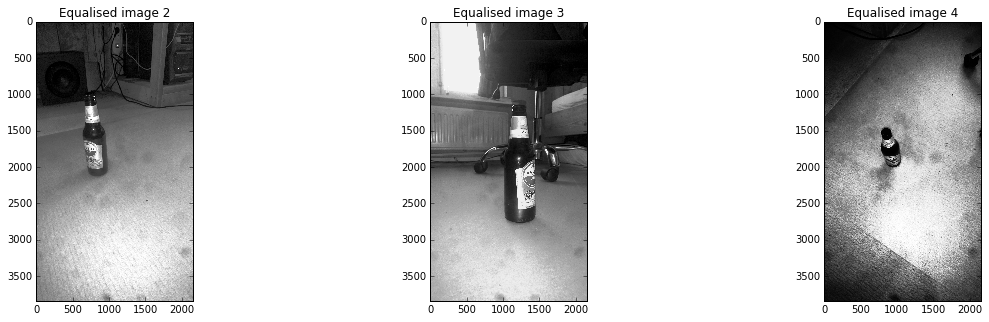

In [57]:
#Plot other three histograms
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(img2.flatten(), arange(0, 256))
plt.xlim(0, 256)
plt.title("Image 2 histogram")

plt.subplot(1,3,2)
plt.hist(img3.flatten(), arange(0, 256))
plt.xlim(0, 256)
plt.title("Image 3 histogram")

plt.subplot(1,3,3)
plt.hist(img4.flatten(), arange(0, 256))
plt.xlim(0, 256)
plt.title("Image 4 histogram")

plt.show()

new_img2 = histogramEqualization(img2, 256, 256)
new_img3 = histogramEqualization(img3, 256, 256)
new_img4 = histogramEqualization(img4, 256, 256)

#Plot the three new histograms
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(new_img2.flatten(), arange(0, img1_range))
plt.xlim(0, 256)
plt.title("Equalised image 2 histogram")

plt.subplot(1,3,2)
plt.hist(new_img3.flatten(), arange(0, img1_range))
plt.xlim(0, 256)
plt.title("Equalised image 3 histogram")

plt.subplot(1,3,3)
plt.hist(new_img4.flatten(), arange(0, img1_range))
plt.xlim(0, 256)
plt.title("Equalised image 4 histogram")

plt.show()

#Plot three images
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(img2, cmap=plt.cm.gray)
plt.title('Image 2')

plt.subplot(1,3,2)
plt.imshow(img3, cmap=plt.cm.gray)
plt.title('Image 3')

plt.subplot(1,3,3)
plt.imshow(img4, cmap=plt.cm.gray)
plt.title('Image 4')

plt.show()

#Plot three new images
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(new_img2, cmap=plt.cm.gray)
plt.title('Equalised image 2')

plt.subplot(1,3,2)
plt.imshow(new_img3, cmap=plt.cm.gray)
plt.title('Equalised image 3')

plt.subplot(1,3,3)
plt.imshow(new_img4, cmap=plt.cm.gray)
plt.title('Equalised image 4')

plt.show()

# Skin Color Detection

   Make a 3D scatter plot (using ``plt.scatter``) of skin colors and
    non skin colors. Randomly select say 500 colors from each class to
    speed things up. Be sure to label the axes of the plot and to pick
    different colors for the skin and non skin colors (no need to color
    each individual color with its RGB value).

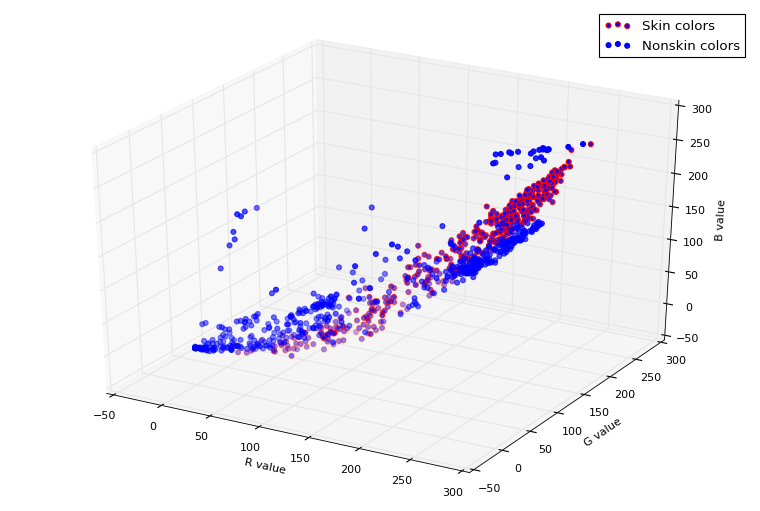

In [3]:
from mpl_toolkits.mplot3d import Axes3D

#Read in image and mask
full = imread('SkinColor/FacePhoto/0520962400.jpg')
mask = imread('SkinColor/GroundT_FacePhoto/0520962400.png')

#Separate all skincolors from nonskin colors
skincolors = full[mask[:,:,0]==255]
nonskincolors = full[mask[:,:,0]==0]

#Pick 500 samples from the arrays
sample_skin = skincolors[np.random.choice(len(skincolors), 500, replace=False)]
sample_nonskin = nonskincolors[np.random.choice(len(nonskincolors), 500, replace=False)]

#Plot those randomly selected points
figure = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
ax = figure.gca(projection='3d')
scatter1 = ax.scatter(sample_skin[:,0], sample_skin[:,1], sample_skin[:,2], color='red')
scatter2 = ax.scatter(sample_nonskin[:,0], sample_nonskin[:,1], sample_nonskin[:,2], color='blue')

ax.set_xlabel('R value')
ax.set_ylabel('G value')
ax.set_zlabel('B value')
ax.legend([scatter1, scatter2], ['Skin colors', 'Nonskin colors'])

plt.show()

Skin color classification in principle can be done in a color space
with only two dimensions as it largely independent on the
intensity. One of the possible color models that makes an explicit
distinction between color and intensity is the Lab color
model. Install skimage to use the function
``skimage.color.rgb2lab``. Then use only the 'a' and 'b' components
of the color.

   #. Make a 2D scatter plot of skin and non skin colors in the 'ab'
      plane. Again use different colors for skin and non skin colors.

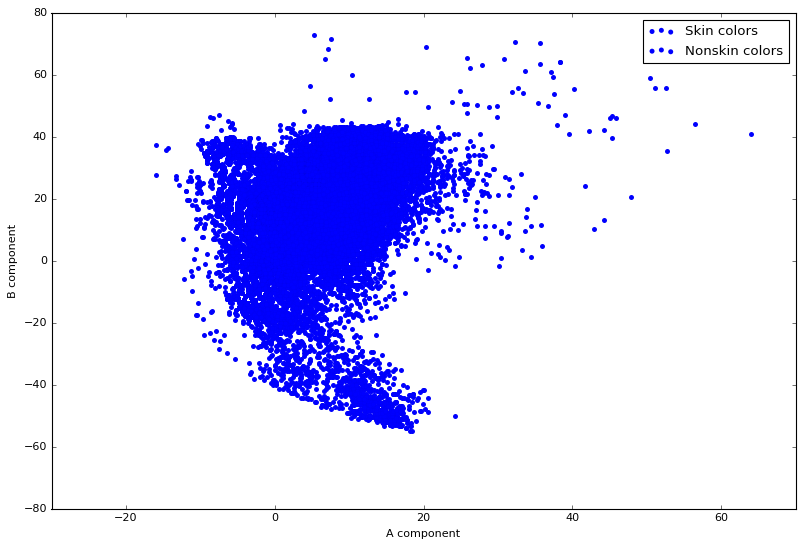

In [4]:
from skimage.color import rgb2lab

#Convert the RGB values to Lab values
lab_skin = rgb2lab([skincolors])
lab_nonskin = rgb2lab([nonskincolors])

#Create a scatter plot of the a and b values of the colors
figure = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.scatter(lab_skin[:,:,1], lab_skin[:,:,2], linewidths = 0.01, label= 'Skin colors')
plt.scatter(lab_nonskin[:,:,1], lab_nonskin[:,:,2], linewidths = 0.01, label='Nonskin colors')
plt.legend()
plt.xlabel('A component')
plt.ylabel('B component')
plt.show()

 #. Learn a logistic regression classifier using just the 'a' and
      'b' color components.

0.834468054176


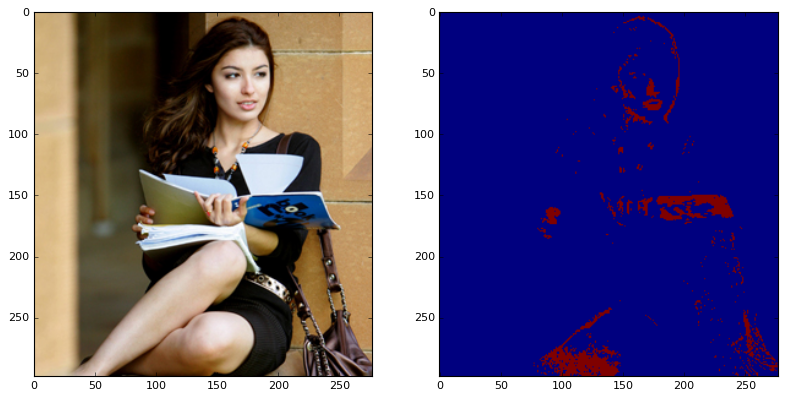

In [5]:
from sklearn.linear_model import LogisticRegressionCV

#Combine skin and non skin and only grab the A and B component
color = np.vstack((lab_skin[0], lab_nonskin[0]))[:,[1,2]]
target = np.concatenate((np.ones(len(lab_skin[0])),np.zeros(len(lab_nonskin[0]))))

#Split data in test set and in learning set
learn_color = color[1::2]
test_color = color[0::2]
learn_target = target[1::2]
test_target = target[0::2]

#Perform a fit
logregr = LogisticRegressionCV()
logregr.fit(learn_color, learn_target)

print(logregr.score(test_color, test_target))

#Convert image_colors to Lab and then predict skin
image_colors = full.reshape((-1,3))
lab_image_colors = rgb2lab([image_colors])[:,:,[1,2]][0]
predict_skin = logregr.predict(lab_image_colors).reshape(full.shape[:2])

#Plot and show original and predicted image
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.subplot(121)
plt.imshow(full)
plt.subplot(122)
plt.imshow(predict_skin)
plt.show()